# Import Libraries

In [22]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sn
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import sys
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import classification_report, accuracy_score

# Read Data file

In [3]:
data = pd.read_csv("heart.csv")

# Analyse Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [8]:
data.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


# Plot Data

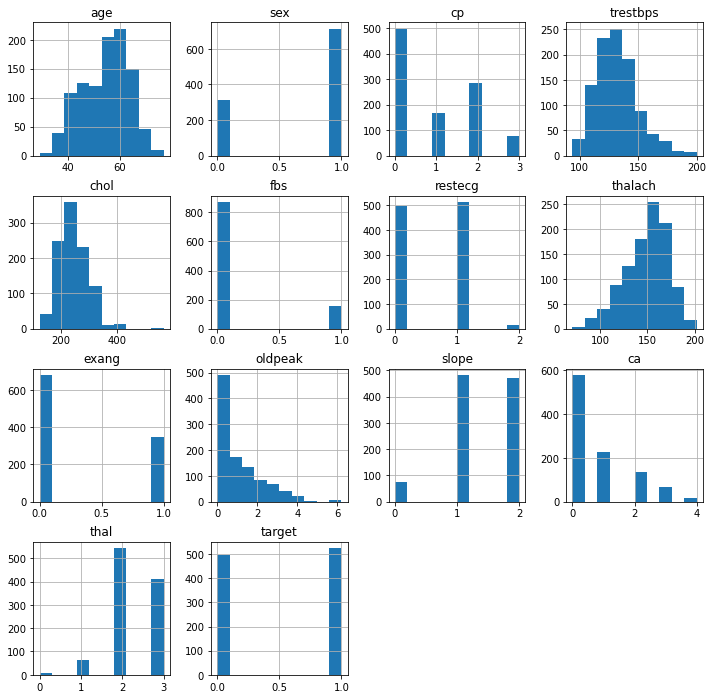

In [9]:
data.hist(figsize=(12,12))
plt.show()

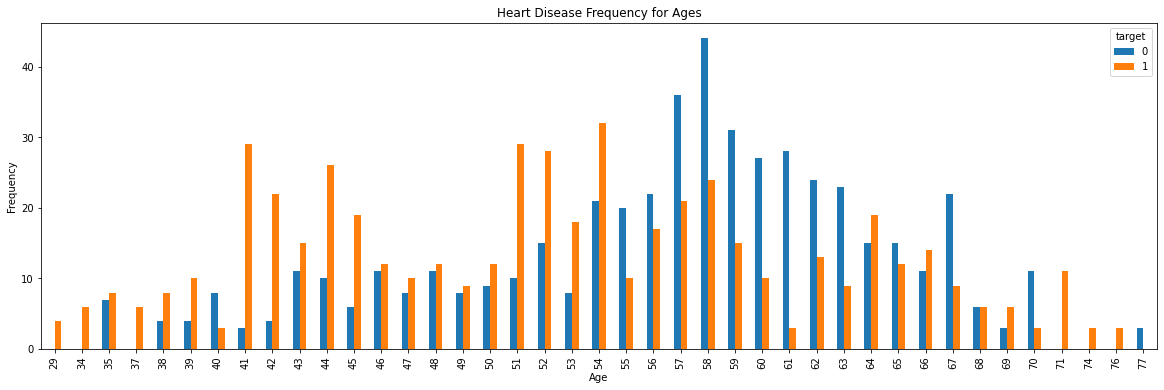

In [10]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

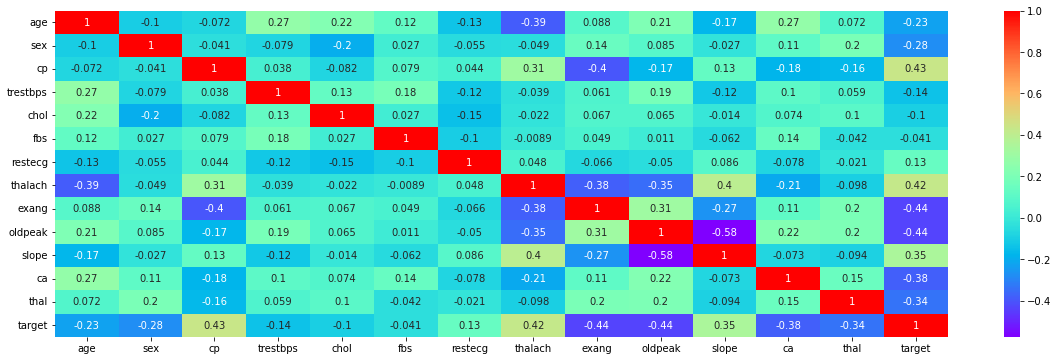

In [16]:
plt.figure(figsize=(20,6))
sn.heatmap(data.corr(), annot=True, cmap="rainbow" )

# Create taining and testing datasets

In [24]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

C:\Users\melcodxb\AppData\Local\Temp\ipykernel_10288\1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


In [25]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,stratify=y, test_size=0.2, random_state=100)

In [30]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(y_train[:10])

(820, 2)
[1 0 0 0 0 0 1 0 0 0]


# Building and Training the Neural Network

In [35]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\melcodxb\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=10)

Epoch 1/500
82/82 [==============================] - 3s 14ms/step - loss: 0.7220 - accuracy: 0.5244 - val_loss: 0.6697 - val_accuracy: 0.6098
Epoch 2/500
82/82 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5659 - val_loss: 0.6416 - val_accuracy: 0.6439
Epoch 3/500
82/82 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.6463 - val_loss: 0.6081 - val_accuracy: 0.6878
Epoch 4/500
82/82 [==============================] - 1s 8ms/step - loss: 0.6219 - accuracy: 0.6585 - val_loss: 0.5823 - val_accuracy: 0.7317
Epoch 5/500
82/82 [==============================] - 1s 8ms/step - loss: 0.6123 - accuracy: 0.6598 - val_loss: 0.6005 - val_accuracy: 0.6829
Epoch 6/500
82/82 [==============================] - 1s 8ms/step - loss: 0.5875 - accuracy: 0.6866 - val_loss: 0.5461 - val_accuracy: 0.7268
Epoch 7/500
82/82 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.7085 - val_loss: 0.5522 - val_accuracy: 0.6976
Epoch 8/500


Epoch 59/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8195 - val_loss: 0.4262 - val_accuracy: 0.7805
Epoch 60/500
82/82 [==============================] - 0s 6ms/step - loss: 0.4333 - accuracy: 0.8195 - val_loss: 0.4285 - val_accuracy: 0.7854
Epoch 61/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.8244 - val_loss: 0.4164 - val_accuracy: 0.8488
Epoch 62/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.8122 - val_loss: 0.3944 - val_accuracy: 0.8049
Epoch 63/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8122 - val_loss: 0.3883 - val_accuracy: 0.8293
Epoch 64/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.8232 - val_loss: 0.4543 - val_accuracy: 0.7707
Epoch 65/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8073 - val_loss: 0.4060 - val_accuracy: 0.8049
Epoch 

82/82 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8378 - val_loss: 0.5254 - val_accuracy: 0.6829
Epoch 117/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8012 - val_loss: 0.3796 - val_accuracy: 0.8439
Epoch 118/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8341 - val_loss: 0.4068 - val_accuracy: 0.8537
Epoch 119/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.8183 - val_loss: 0.4187 - val_accuracy: 0.7854
Epoch 120/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.8305 - val_loss: 0.3837 - val_accuracy: 0.8439
Epoch 121/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4247 - accuracy: 0.8280 - val_loss: 0.4218 - val_accuracy: 0.8049
Epoch 122/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.8293 - val_loss: 0.3846 - val_accuracy: 0.8293
Epoch 123/500

82/82 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.8256 - val_loss: 0.3755 - val_accuracy: 0.8488
Epoch 174/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.8122 - val_loss: 0.3582 - val_accuracy: 0.8585
Epoch 175/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.8232 - val_loss: 0.3778 - val_accuracy: 0.8439
Epoch 176/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.8390 - val_loss: 0.3675 - val_accuracy: 0.8488
Epoch 177/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4335 - accuracy: 0.8293 - val_loss: 0.4781 - val_accuracy: 0.8195
Epoch 178/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8390 - val_loss: 0.3915 - val_accuracy: 0.8439
Epoch 179/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8390 - val_loss: 0.3908 - val_accuracy: 0.8146
Epoch 180/500

82/82 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.8232 - val_loss: 0.4016 - val_accuracy: 0.8390
Epoch 231/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8256 - val_loss: 0.4347 - val_accuracy: 0.8000
Epoch 232/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8244 - val_loss: 0.3789 - val_accuracy: 0.8537
Epoch 233/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8280 - val_loss: 0.3940 - val_accuracy: 0.8439
Epoch 234/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8232 - val_loss: 0.4019 - val_accuracy: 0.8146
Epoch 235/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.8415 - val_loss: 0.3869 - val_accuracy: 0.8439
Epoch 236/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8244 - val_loss: 0.3779 - val_accuracy: 0.8439
Epoch 237/500

82/82 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8439 - val_loss: 0.4282 - val_accuracy: 0.8585
Epoch 288/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4377 - accuracy: 0.8402 - val_loss: 0.4141 - val_accuracy: 0.8390
Epoch 289/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8305 - val_loss: 0.3766 - val_accuracy: 0.8585
Epoch 290/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8317 - val_loss: 0.4378 - val_accuracy: 0.8195
Epoch 291/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8537 - val_loss: 0.4786 - val_accuracy: 0.8341
Epoch 292/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8378 - val_loss: 0.3676 - val_accuracy: 0.8537
Epoch 293/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.8341 - val_loss: 0.3793 - val_accuracy: 0.8585
Epoch 294/500

82/82 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8463 - val_loss: 0.3981 - val_accuracy: 0.8439
Epoch 345/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8354 - val_loss: 0.3775 - val_accuracy: 0.8341
Epoch 346/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8415 - val_loss: 0.3959 - val_accuracy: 0.8488
Epoch 347/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8341 - val_loss: 0.3864 - val_accuracy: 0.8585
Epoch 348/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8293 - val_loss: 0.4107 - val_accuracy: 0.8341
Epoch 349/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8427 - val_loss: 0.3789 - val_accuracy: 0.8585
Epoch 350/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.8390 - val_loss: 0.3795 - val_accuracy: 0.8585
Epoch 351/500

82/82 [==============================] - 0s 5ms/step - loss: 0.4237 - accuracy: 0.8585 - val_loss: 0.4105 - val_accuracy: 0.8098
Epoch 402/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.8390 - val_loss: 0.4090 - val_accuracy: 0.8488
Epoch 403/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4052 - accuracy: 0.8402 - val_loss: 0.4111 - val_accuracy: 0.8244
Epoch 404/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.8317 - val_loss: 0.4057 - val_accuracy: 0.8341
Epoch 405/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8268 - val_loss: 0.3645 - val_accuracy: 0.8683
Epoch 406/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8451 - val_loss: 0.4508 - val_accuracy: 0.8390
Epoch 407/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8329 - val_loss: 0.4001 - val_accuracy: 0.8195
Epoch 408/500

82/82 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.8451 - val_loss: 0.3715 - val_accuracy: 0.8634
Epoch 459/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8329 - val_loss: 0.4141 - val_accuracy: 0.8537
Epoch 460/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8390 - val_loss: 0.3973 - val_accuracy: 0.8585
Epoch 461/500
82/82 [==============================] - 1s 6ms/step - loss: 0.4154 - accuracy: 0.8305 - val_loss: 0.3911 - val_accuracy: 0.8732
Epoch 462/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8451 - val_loss: 0.4616 - val_accuracy: 0.8341
Epoch 463/500
82/82 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8354 - val_loss: 0.4007 - val_accuracy: 0.8488
Epoch 464/500
82/82 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8329 - val_loss: 0.4853 - val_accuracy: 0.7756
Epoch 465/500

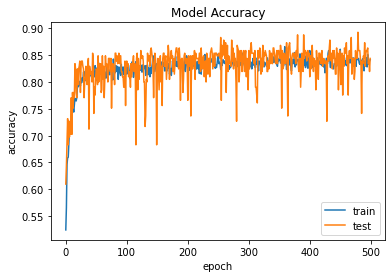

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

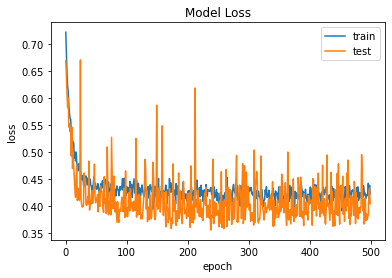

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [41]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

print("Results for Categorical Model")
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8439024390243902
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.88      0.81      0.84       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205

